In [1]:
#Import all Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
#@title
%%HTML
<h3> Question1</h3><br><font=3>Display the data types of each column using the attribute dtype, then take a screenshot and submit it, include your cod0e in the image.</font> 

In [3]:
df = pd.read_csv('data/kc_house_data.csv',index_col=0)
print(df.dtypes)

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [4]:
#@title
%%HTML
<h3>Question 2</h3><br>
<font=3>Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the inplace parameter is set to True</font>

In [5]:
df.head()
df.drop(['id','Unnamed: 0'],axis=1,inplace=True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#@title
%%HTML
<h3>Question 3</h3>
<font=3>Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.</font>

In [6]:
sr = df['floors'].value_counts().to_frame()
print(sr)

     floors
1.0   10680
2.0    8241
1.5    1910
3.0     613
2.5     161
3.5       8


In [7]:
#@title
%%HTML
<h3>Question 4</h3>
<br>
<font=3>Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers </font>

c:\users\afshan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='waterfront', ylabel='price'>

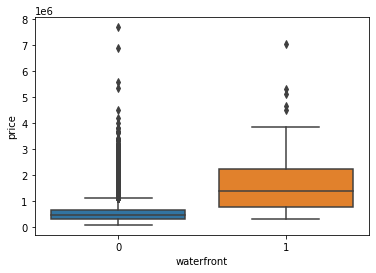

In [7]:
sns.boxplot(df['waterfront'],df['price'])

In [15]:
#@title
%%HTML
<h3>Question 5</h3>
<br>
<font=3>Use the function  regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.</font>

(0.0, 8081250.0)

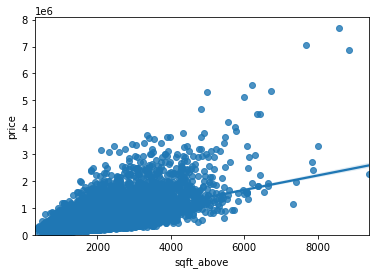

In [8]:
sns.regplot(x='sqft_above', y='price',data=df)
plt.ylim(0,)

In [9]:
#@title
%%HTML
<h3>Question 6</h3>
<br>
<font=3>Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2.</font>

In [9]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

In [11]:
#@title
%%HTML
<h3>Question 7</h3>
<br>
<font=3>Fit a linear regression model to predict the 'price' using the list of features:</font>

In [10]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     
X = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y = df['price']
lm2 = LinearRegression()
lm2
lm2.fit(X,Y)
lm2.score(X, Y)

0.6577151058279325

In [12]:
#@title
%%HTML
<h3>Question 8</h3>
<br>
<font=3>Use the list to create a pipeline object, predict the 'price', fit the object using the features in the list  features , then fit the model and calculate the R^2</font>

In [ ]:
#pipe=Pipeline(Input)
from sklearn.svm import SVC
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X,Y)
pipe.score(X,Y)

In [13]:
#@title
%%HTML
<h3>Question 9</h3>
<br>
<font=3>Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data. </font>

In [12]:
Rig = Ridge(alpha=0.1)
Rig.fit(x_train,y_train)
Rig.score(x_test,y_test)

NameError: name 'x_train' is not defined

In [14]:
#@title
%%HTML
<h3>Question 10</h3>
<br>
<font=3>Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1. Calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.</font>

In [0]:
pf = PolynomialFeatures(degree=2)
x_train_pf = pf.fit_transform(x_train)
x_test_pf = pf.fit_transform(x_test)
rig = Ridge(alpha=0.1)
rig.fit(x_train_pf,y_train)
rig.score(x_test_pf,y_test)